In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def harmonic_shoot(y, x, beta):
    return [y[1], (x**2- beta) * y[0]]  

In [3]:
tol = 1e-4  # tolerance for eigenvalue convergence
colors = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting the eigenfunctions
L = 4  
phi0 = [0, 0.005]  
x_range = np.linspace(-L, L, 81)  
beta_start = 10
dbeta = 0.1

In [4]:
A1 = []
A2 = []

Eigenvalue for mode 1: 1.0000005006790142 with value of x and y as (4.0, 0.0006463782418153898)
Eigenvalue for mode 2: 3.0000144958496118 with value of x and y as (4.0, -0.0007067797039448356)
Eigenvalue for mode 3: 5.000195312500007 with value of x and y as (4.0, 0.0007803397392316893)
Eigenvalue for mode 4: 7.001660156250008 with value of x and y as (4.0, -0.0008585651472612882)
Eigenvalue for mode 5: 9.008984375000006 with value of x and y as (4.0, 0.0010307269852579243)


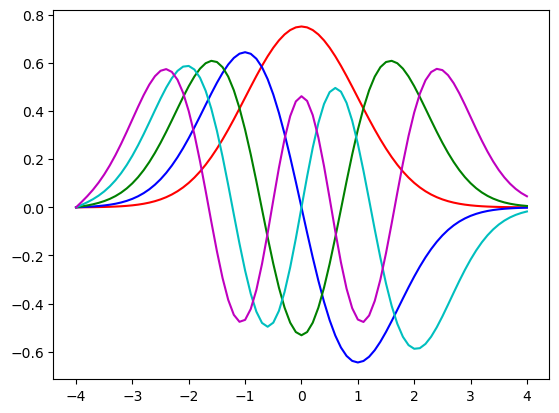

In [5]:
for mode in range(1, 6):
    beta = 2 * mode + 1 
    dbeta = 0.1
    for _ in range(1000):  
        
        y = odeint(harmonic_shoot, phi0, x_range, args=(beta,))

        phi_guess = y[-1, 1] + np.sqrt(L**2-beta)*y[-1,0]
        if abs(phi_guess) < tol:  
            print(f"Eigenvalue for mode {mode}: {beta} with value of x and y as ({x_range[-1]}, {y[-1,0]})")
            A2.append(beta)
            break
        
        if (-1) ** (mode) * (phi_guess) > 0:
            beta -= dbeta
        else:
            beta += dbeta / 2
            dbeta /= 2
    
    norm = np.trapz(y[:, 0] ** 2, x_range)
    normalized_eigenfunction = y[:, 0] / np.sqrt(norm)
    A1.append(normalized_eigenfunction)
    plt.plot(x_range, normalized_eigenfunction, colors [mode-1], label=f'Mode {mode-1}')
    
    beta_start = beta - 0.2


In [6]:
A1 = np.array(A1)
display(A1)


array([[ 0.00000000e+00,  1.99580616e-04,  4.27585218e-04,
         7.13389233e-04,  1.09029064e-03,  1.59838647e-03,
         2.28732438e-03,  3.21906268e-03,  4.47065830e-03,
         6.13705998e-03,  8.33378022e-03,  1.11992764e-02,
         1.48968006e-02,  1.96154201e-02,  2.55698680e-02,
         3.29988674e-02,  4.21615527e-02,  5.33316860e-02,
         6.67894037e-02,  8.28103731e-02,  1.01652402e-01,
         1.23539766e-01,  1.48645725e-01,  1.77073992e-01,
         2.08840129e-01,  2.43854078e-01,  2.81905169e-01,
         3.22651006e-01,  3.65611637e-01,  4.10170113e-01,
         4.55580409e-01,  5.00983128e-01,  5.45428967e-01,
         5.87909316e-01,  6.27392800e-01,  6.62866036e-01,
         6.93376397e-01,  7.18074312e-01,  7.36252495e-01,
         7.47379569e-01,  7.51125861e-01,  7.47379637e-01,
         7.36252632e-01,  7.18074514e-01,  6.93376660e-01,
         6.62866358e-01,  6.27393177e-01,  5.87909745e-01,
         5.45429446e-01,  5.00983653e-01,  4.55580979e-0

In [7]:
A2 = np.array(A2)
display(A2)

array([1.0000005 , 3.0000145 , 5.00019531, 7.00166016, 9.00898438])

In [8]:
np.save("A1.npy", A1)
np.save("A2.npy", A2)